### Import the required library files:

In [1]:
# Loading the library with the iris dataset
from sklearn.datasets import load_iris

# Loading scikit learn's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Loading pandas
import pandas as pd

# Loading numpy
import numpy as np

# Setting random seed
np.random.seed(0)

### Load the data from the iris dataset:

In [2]:
# create an object called iris:
iris = load_iris()

# Create dataframe with the four freature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the first 5 rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Now we will add our target feature to our DataFrame 'df' called 'species'

In [3]:
# add new target feature called species
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the first 5 rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


### create train and test data:

In [5]:
# train and test split
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the first 5 rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


### After generating the train and test data, we will split them it into the two different variables called train and test:

In [6]:
train,test = df[df['is_train'] == True], df[df['is_train'] == False]

#Show the number of training and testing data
print("Number of observations in the training data: ",len(train))
print("Number of observations in the testing data: ",len(test))

Number of observations in the training data:  118
Number of observations in the testing data:  32


### Now pull out the features columns from our dataframe:

In [7]:
features = df.columns[:4]
print(features)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


### Now we need to convert the each species into the digits using fatorization for train data:

In [8]:
y = pd.factorize(train['species'])[0]
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2]


### Let's create the forest

In [9]:
# Create random forest classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the classifier
clf.fit(train[features],y)

RandomForestClassifier(n_jobs=2, random_state=0)

### Let's test our created Forest :)

In [10]:
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [12]:
# View the probability for the first 10 columns
clf.predict_proba(test[features])[0:10]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [18]:
preds = iris.target_names[clf.predict(test[features])]
print(preds[:20])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'versicolor' 'versicolor']


In [68]:
test['species'].head(5)

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

### Let's create confusion matrix so that we can see our predictions visualy

In [20]:
pd.crosstab(test['species'],preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


### At the end now we will visualize our tree

In [21]:
from sklearn.tree import export_graphviz

In [64]:
len(clf.estimators_)

100

In [65]:
#  Extract single tree
estimator = clf.estimators_[99]
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [66]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

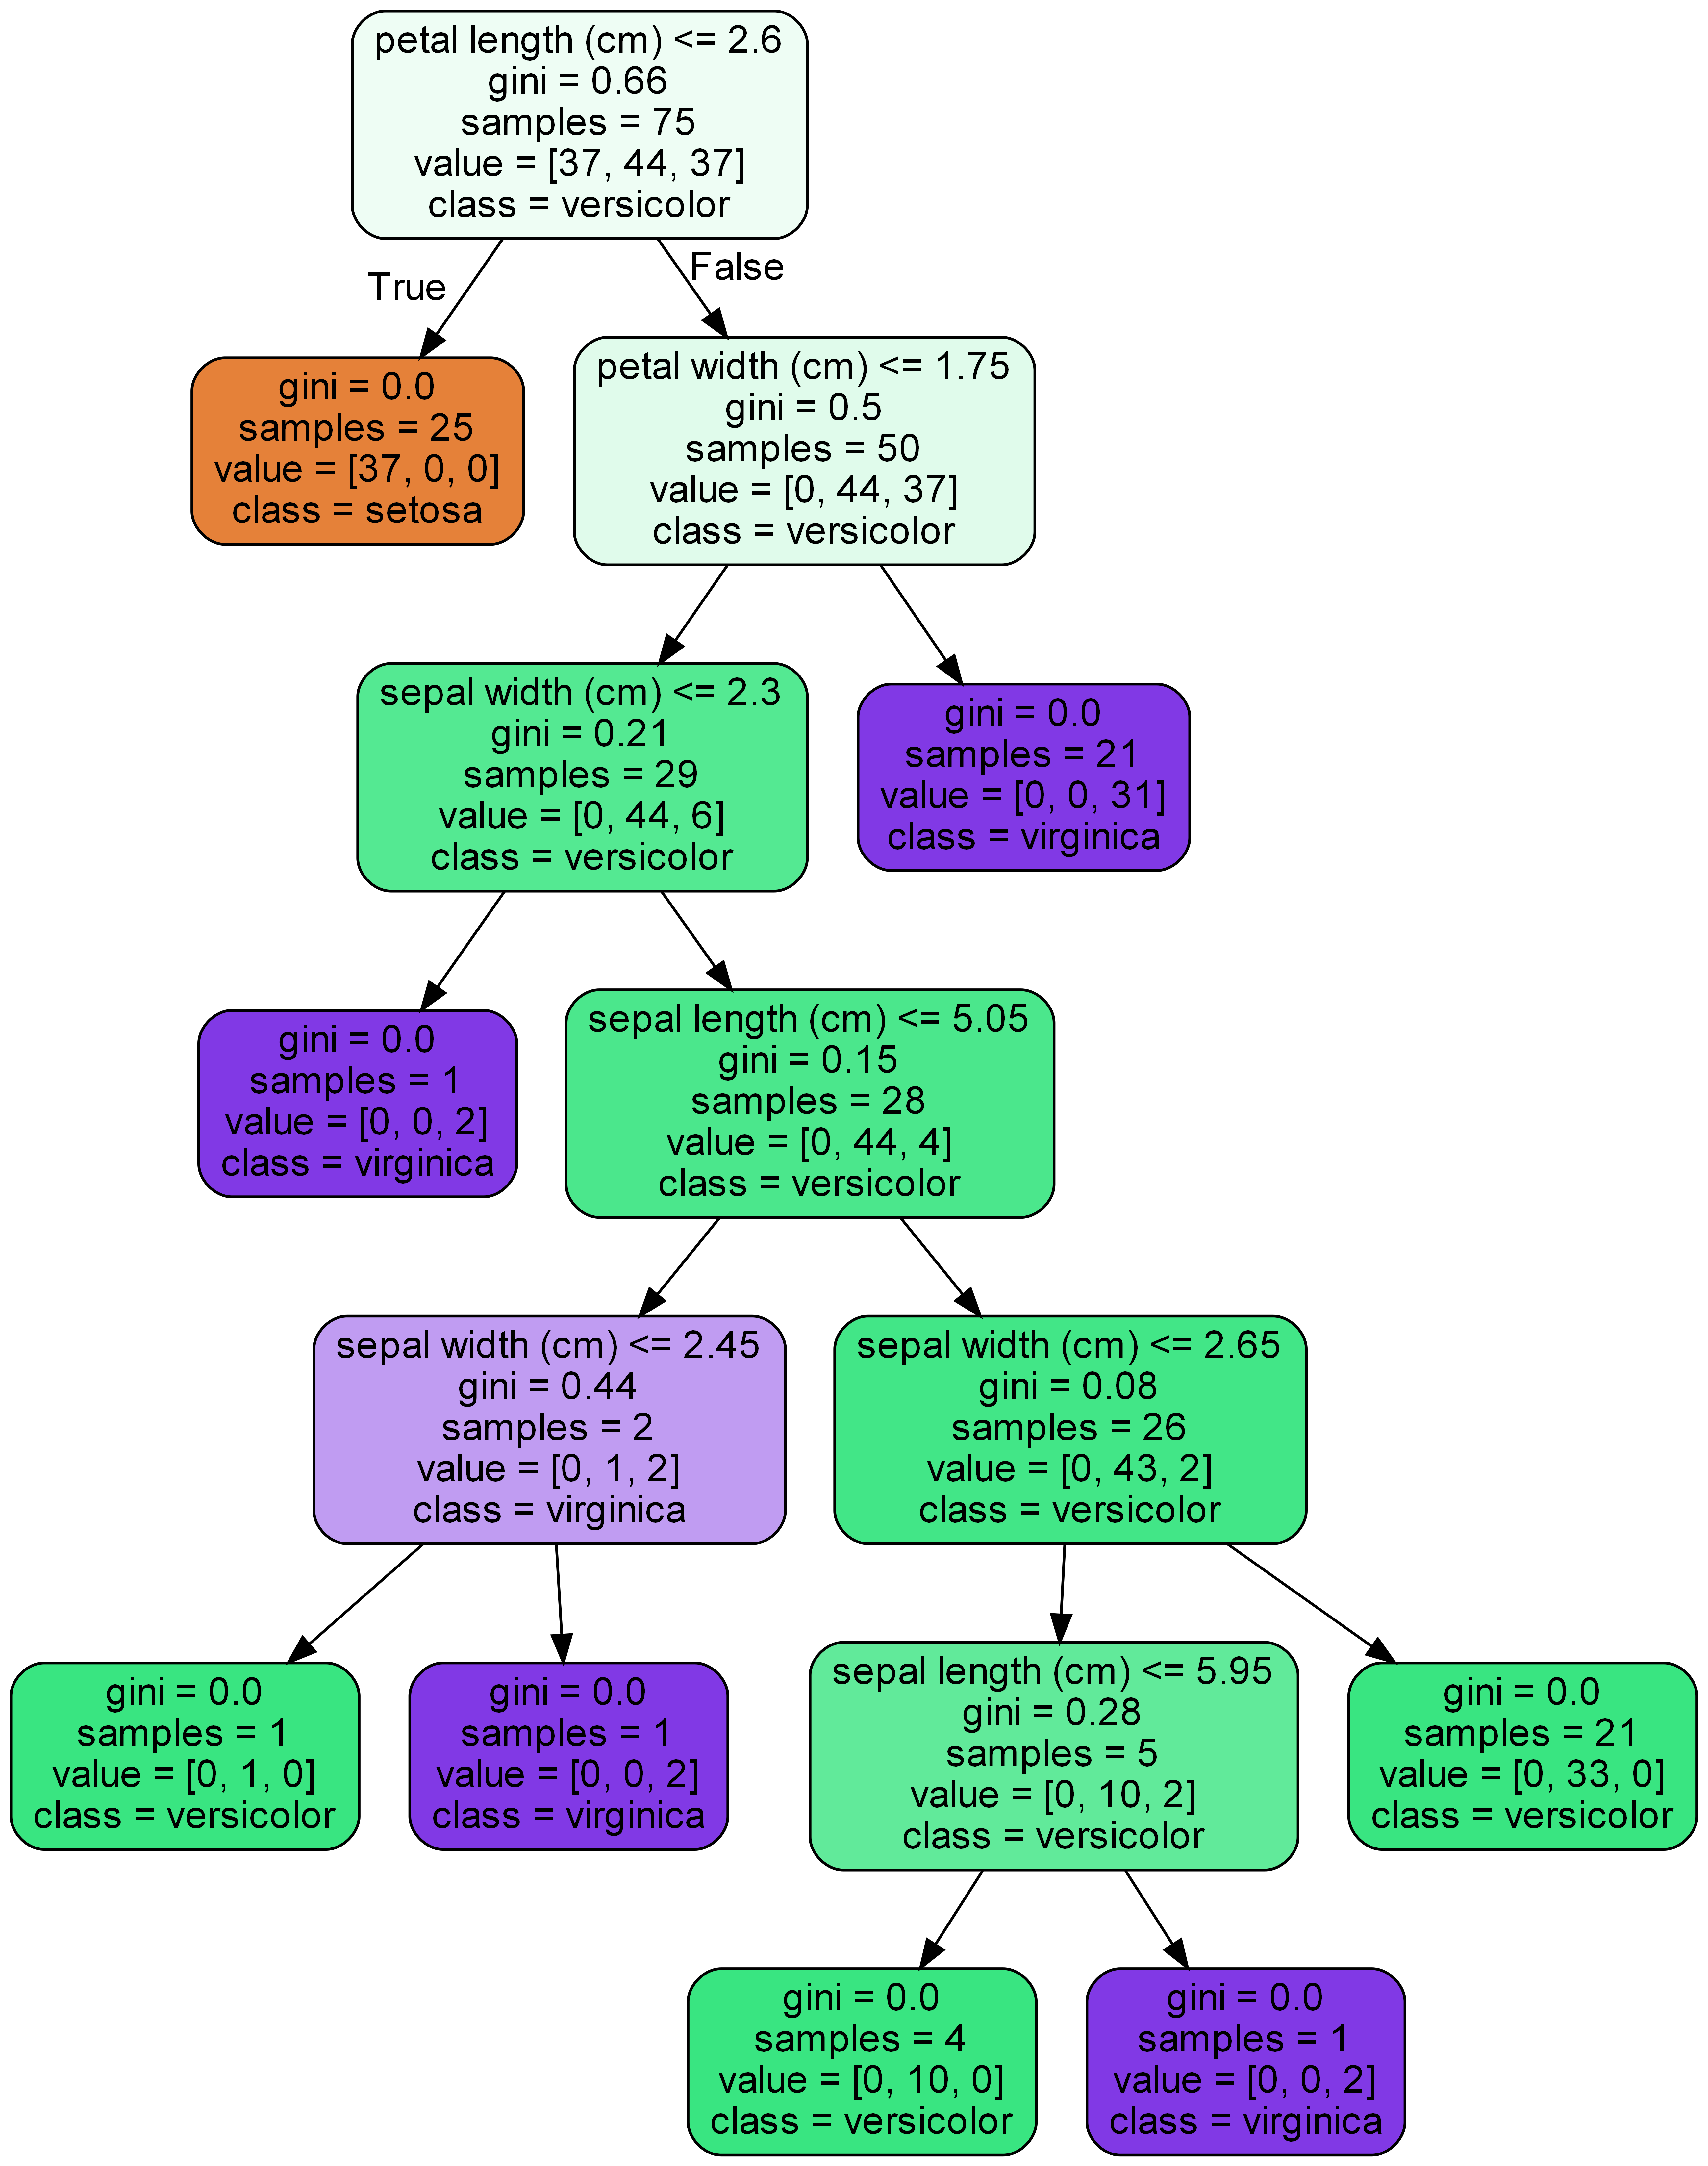

In [67]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')